In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_swiss_roll


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim


(55, 55)

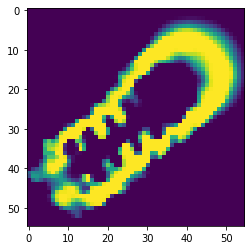

In [5]:
#orbium
data = [[0,0,0,0,0,0,0.1,0.14,0.1,0,0,0.03,0.03,0,0,0.3,0,0,0,0], [0,0,0,0,0,0.08,0.24,0.3,0.3,0.18,0.14,0.15,0.16,0.15,0.09,0.2,0,0,0,0], [0,0,0,0,0,0.15,0.34,0.44,0.46,0.38,0.18,0.14,0.11,0.13,0.19,0.18,0.45,0,0,0], [0,0,0,0,0.06,0.13,0.39,0.5,0.5,0.37,0.06,0,0,0,0.02,0.16,0.68,0,0,0], [0,0,0,0.11,0.17,0.17,0.33,0.4,0.38,0.28,0.14,0,0,0,0,0,0.18,0.42,0,0], [0,0,0.09,0.18,0.13,0.06,0.08,0.26,0.32,0.32,0.27,0,0,0,0,0,0,0.82,0,0], [0.27,0,0.16,0.12,0,0,0,0.25,0.38,0.44,0.45,0.34,0,0,0,0,0,0.22,0.17,0], [0,0.07,0.2,0.02,0,0,0,0.31,0.48,0.57,0.6,0.57,0,0,0,0,0,0,0.49,0], [0,0.59,0.19,0,0,0,0,0.2,0.57,0.69,0.76,0.76,0.49,0,0,0,0,0,0.36,0], [0,0.58,0.19,0,0,0,0,0,0.67,0.83,0.9,0.92,0.87,0.12,0,0,0,0,0.22,0.07], [0,0,0.46,0,0,0,0,0,0.7,0.93,1,1,1,0.61,0,0,0,0,0.18,0.11], [0,0,0.82,0,0,0,0,0,0.47,1,1,0.98,1,0.96,0.27,0,0,0,0.19,0.1], [0,0,0.46,0,0,0,0,0,0.25,1,1,0.84,0.92,0.97,0.54,0.14,0.04,0.1,0.21,0.05], [0,0,0,0.4,0,0,0,0,0.09,0.8,1,0.82,0.8,0.85,0.63,0.31,0.18,0.19,0.2,0.01], [0,0,0,0.36,0.1,0,0,0,0.05,0.54,0.86,0.79,0.74,0.72,0.6,0.39,0.28,0.24,0.13,0], [0,0,0,0.01,0.3,0.07,0,0,0.08,0.36,0.64,0.7,0.64,0.6,0.51,0.39,0.29,0.19,0.04,0], [0,0,0,0,0.1,0.24,0.14,0.1,0.15,0.29,0.45,0.53,0.52,0.46,0.4,0.31,0.21,0.08,0,0], [0,0,0,0,0,0.08,0.21,0.21,0.22,0.29,0.36,0.39,0.37,0.33,0.26,0.18,0.09,0,0,0], [0,0,0,0,0,0,0.03,0.13,0.19,0.22,0.24,0.24,0.23,0.18,0.13,0.05,0,0,0,0], [0,0,0,0,0,0,0,0,0.02,0.06,0.08,0.09,0.07,0.05,0.01,0,0,0,0,0]]
#pacman wing
data = [[0,0,0,0,0,0,0,0,0,0,0,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.01,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0.01,0.01,0.01,0.02,0.05,0.29,0.10,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0.01,0.01,0.01,0.01,0.01,0,0], [0,0,0,0,0,0,0,0,0,0.01,0.03,0.03,0.02,0.44,0.53,0.65,0.88,0.48,0.62,0.82,0.72,0.06,0.01,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.01,0.01,0.01,0,0], [0,0,0,0,0,0,0,0,0.01,0.02,0.08,0.47,0.91,0.90,0.05,0.06,0.46,0.99,0.95,0.07,0.06,0.35,0.73,0.02,0.02,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0.01,0.01,0.07,0.96,0.99,0.99,0.17,0.13,0.16,0.56,0.69,0.55,0.12,0.10,0.11,0.99,0.58,0.07,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0.01,0.01,0.02,0.95,0.17,0.64,0.75,0.44,0.37,0.48,0.63,0.73,0.64,0.15,0.13,0.45,0.91,0.99,0.96,0.56,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0.01,0.01,0.02,0.10,0.42,0.15,0.20,0.43,0.49,0.72,0.80,0.82,0.87,0.82,0.68,0.64,0.72,0.74,0.31,0.07,0.19,0.21,0.01,0.01,0,0,0,0,0,0,0,0,0,0.01,0,0,0,0,0,0], [0,0,0,0,0.01,0.02,0.02,0.08,0.95,0.17,0.17,0.44,0.75,0.65,0.68,0.72,0.38,0.48,0.85,0.87,0.86,0.84,0.65,0.15,0.12,0.10,0.84,0.01,0.01,0,0,0,0,0,0,0,0,0,0.01,0.01,0.01,0,0,0,0], [0,0,0,0.01,0.01,0.08,0.34,0.94,0.20,0.24,0.44,0.82,0.84,0.26,0.33,0.09,0.09,0.15,0.36,0.62,0.42,0.64,0.78,0.26,0.27,0.60,0.97,0.03,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0.01,0.05,0.84,0.95,0.26,0.44,0.40,0.84,0.94,0.64,0.17,0.03,0.02,0.02,0.02,0.04,0.07,0.15,0.66,0.89,0.24,0.51,0.73,0.95,0.96,0.04,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0.01,0.27,0.96,0.85,0.47,0.76,0.64,0.89,0.96,0.25,0.05,0.02,0.02,0.05,0.07,0.02,0.02,0.02,0.09,0.65,0.43,0.66,0.62,0.57,0.06,0.65,0.01,0,0,0,0,0,0,0,0,0.01,0,0,0,0,0,0], [0,0,0.01,0.02,0.41,0.96,0.92,0.76,0.83,0.72,0.55,0.22,0.06,0.03,0.02,0.06,0.04,0.03,0.04,0.02,0.02,0.03,0.29,0.44,0.81,0.76,0.69,0.04,0.67,0.01,0,0,0,0,0,0,0,0.01,0.01,0.01,0.01,0,0,0,0], [0,0,0.01,0.02,0.23,0.97,0.88,0.68,0.78,0.16,0.06,0.03,0.02,0.03,0.91,0.49,0.01,0.01,0.03,0.04,0.02,0.03,0.22,0.39,0.84,0.78,0.70,0.18,0.13,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0.01,0.01,0.11,0.95,0.18,0.27,0.53,0.07,0.04,0.02,0.03,0.11,0.91,0.22,0.01,0.01,0.04,0.95,0.70,0.04,0.20,0.63,0.76,0.71,0.33,0.96,0.02,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0.01,0.04,0.91,0.13,0.12,0.35,0.48,0.11,0.04,0.04,0.12,0.95,0.04,0.02,0.03,0.93,0.87,0.95,0.06,0.10,0.44,0.63,0.19,0.21,0.93,0.02,0.01,0.01,0,0,0,0,0,0,0,0.01,0,0,0,0,0,0], [0,0,0,0.01,0.02,0.95,0.16,0.13,0.13,0.99,0.98,0.07,0.04,0.04,0.82,0.06,0.04,0.05,0.86,0.93,0.22,0.09,0.09,0.65,0.72,0.24,0.15,0.87,0.03,0.02,0.01,0,0,0,0,0,0,0,0.01,0.01,0.01,0,0,0,0], [0,0,0.01,0.01,0.02,0.91,0.84,0.18,0.14,0.99,0.98,0.08,0.04,0.04,0.40,0.07,0.04,0.05,0.06,0.05,0.02,0.09,0.11,0.77,0.79,0.42,0.14,0.95,0.03,0.02,0.01,0,0,0,0,0,0,0,0,0.01,0.01,0,0,0,0], [0,0,0.01,0.01,0.02,0.24,0.95,0.18,0.18,0.98,0.96,0.11,0.04,0.04,0.06,0.05,0.04,0.04,0.03,0.02,0.02,0.09,0.55,0.87,0.87,0.85,0.56,0.90,0.02,0.02,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0.01,0.02,0.05,0.96,0.83,0.13,0.17,0.21,0.20,0.21,0.12,0.04,0.04,0.04,0.05,0.07,0.05,0.04,0.05,0.21,0.78,0.89,0.89,0.81,0.93,0.04,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0.01,0.03,0.91,0.95,0.09,0.08,0.19,0.20,0.12,0.14,0.33,0.38,0.05,0.04,0.20,0.97,0.98,0.15,0.10,0.14,0.77,0.87,0.86,0.10,0.40,0.02,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0.01,0.01,0.04,0.96,0.81,0.17,0.09,0.65,0.31,0.31,0.85,0.99,0.87,0.09,0.06,0.20,0.93,0.99,0.13,0.09,0.16,0.83,0.88,0.21,0.03,0.14,0.01,0.01,0,0,0,0,0,0,0.01,0.01,0,0,0,0,0,0,0,0], [0,0.01,0.01,0.04,0.93,0.94,0.94,0.96,0.98,0.12,0.15,0.87,0.99,0.73,0.05,0.05,0.09,0.99,0.96,0.11,0.10,0.26,0.97,0.99,0.15,0.05,0.05,0.01,0,0,0,0,0,0,0,0,0.01,0.01,0.01,0,0,0,0,0,0], [0,0,0.01,0.02,0.89,0.96,0.94,0.45,0.96,0.05,0.04,0.15,0.95,0.76,0.04,0.05,0.07,0.80,0.19,0.07,0.08,0.33,1.00,0.92,0.94,0.32,0.02,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0.01,0.02,0.04,0.56,0.93,0.29,0.45,0.05,0.03,0.04,0.96,0.92,0.06,0.04,0.07,0.90,0.10,0.06,0.05,0.20,0.91,0.07,0.07,0.02,0.02,0.01,0,0,0,0,0,0.01,0.01,0,0,0,0,0,0,0,0,0,0], [0,0,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.09,0.29,0.75,0.98,0.98,0.14,0.05,0.89,0.98,0.95,0.46,0.49,0.81,0.05,0.04,0.04,0.02,0.01,0,0,0,0,0,0,0,0.01,0.01,0,0,0,0,0,0,0,0,0], [0,0,0.01,0,0,0.01,0.01,0.01,0.02,0.01,0.01,0.08,0.21,0.78,0.95,0.96,0.90,0.07,0.65,0.58,0.23,0.02,0.01,0.02,0.02,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0.01,0.01,0.01,0.01,0.01,0.03,0.09,0.08,0.08,0.43,0.33,0.16,0.02,0.02,0.01,0.01,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0.01,0.01,0.02,0.01,0.02,0.02,0.03,0.02,0.02,0.02,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0.01,0.01,0.01,0,0,0,0,0,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0.01,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0.01,0.01,0.01,0,0,0,0,0.01,0.01,0,0,0.01,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.01,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.01,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.01,0,0,0,0,0,0.01,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
# geminium
data = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.01,0.02,0.03,0.04,0.04,0.04,0.03,0.02,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.04,0.1,0.16,0.2,0.23,0.25,0.24,0.21,0.18,0.14,0.1,0.07,0.03,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.01,0.09,0.2,0.33,0.44,0.52,0.56,0.58,0.55,0.51,0.44,0.37,0.3,0.23,0.16,0.08,0.01,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.13,0.29,0.45,0.6,0.75,0.85,0.9,0.91,0.88,0.82,0.74,0.64,0.55,0.46,0.36,0.25,0.12,0.03,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.14,0.38,0.6,0.78,0.93,1.0,1.0,1.0,1.0,1.0,1.0,0.99,0.89,0.78,0.67,0.56,0.44,0.3,0.15,0.04,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.08,0.39,0.74,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.98,0.85,0.74,0.62,0.47,0.3,0.14,0.03,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.32,0.76,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.88,0.75,0.61,0.45,0.27,0.11,0.01,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.35,0.83,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.88,0.73,0.57,0.38,0.19,0.05,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.99,1.0,1.0,1.0,1.0,0.99,1.0,1.0,1.0,1.0,1.0,1.0,0.85,0.67,0.47,0.27,0.11,0.01], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.55,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.93,0.83,0.79,0.84,0.88,0.89,0.9,0.93,0.98,1.0,1.0,1.0,1.0,0.98,0.79,0.57,0.34,0.15,0.03], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.47,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.72,0.54,0.44,0.48,0.6,0.7,0.76,0.82,0.91,0.99,1.0,1.0,1.0,1.0,0.91,0.67,0.41,0.19,0.05], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.27,0.99,1.0,1.0,1.0,1.0,0.9,0.71,0.65,0.55,0.38,0.2,0.14,0.21,0.36,0.52,0.64,0.73,0.84,0.95,1.0,1.0,1.0,1.0,1.0,0.78,0.49,0.24,0.07], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.14,0.63,0.96,1.0,1.0,1.0,0.84,0.17,0,0,0,0,0,0,0,0.13,0.35,0.51,0.64,0.77,0.91,0.99,1.0,1.0,1.0,1.0,0.88,0.58,0.29,0.09], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0.38,0.72,0.95,1.0,1.0,1.0,0.22,0,0,0,0,0,0,0,0,0,0.11,0.33,0.5,0.67,0.86,0.99,1.0,1.0,1.0,1.0,0.95,0.64,0.33,0.1], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.32,0.49,0.71,0.93,1.0,1.0,1.0,0.56,0,0,0,0,0,0,0,0,0,0,0,0.1,0.31,0.52,0.79,0.98,1.0,1.0,1.0,1.0,0.98,0.67,0.35,0.11], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.01,0.6,0.83,0.98,1.0,1.0,0.68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.15,0.38,0.71,0.97,1.0,1.0,1.0,1.0,0.97,0.67,0.35,0.11], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.51,0.96,1.0,1.0,0.18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.09,0.34,0.68,0.95,1.0,1.0,1.0,1.0,0.91,0.61,0.32,0.1], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.13,0.56,0.99,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.17,0.45,0.76,0.96,1.0,1.0,1.0,1.0,0.82,0.52,0.26,0.07], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.33,0.7,0.94,1.0,1.0,0.44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.33,0.68,0.91,0.99,1.0,1.0,1.0,1.0,0.71,0.42,0.19,0.03], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.53,0.89,1.0,1.0,1.0,0.8,0.43,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.47,0.86,1.0,1.0,1.0,1.0,1.0,0.95,0.58,0.32,0.12,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.77,0.99,1.0,0.97,0.58,0.41,0.33,0.18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.54,0.95,1.0,1.0,1.0,1.0,1.0,0.8,0.44,0.21,0.06,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.39,0.83,1.0,1.0,0.55,0.11,0.05,0.15,0.22,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.58,0.99,1.0,1.0,1.0,1.0,1.0,0.59,0.29,0.11,0.01,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.04,0.55,0.81,0.86,0.97,1.0,1.0,0.5,0,0,0.01,0.09,0.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0.26,0.78,1.0,1.0,1.0,1.0,1.0,0.66,0.35,0.13,0.03,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.33,1.0,1.0,1.0,1.0,1.0,1.0,0.93,0.11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.23,0.73,0.95,1.0,1.0,1.0,1.0,1.0,0.62,0.35,0.12,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.51,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.56,0.25,0.09,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.12,0.38,1.0,1.0,1.0,0.66,0.08,0.55,1.0,1.0,1.0,0.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0.35,1.0,1.0,1.0,1.0,1.0,1.0,0.67,0.12,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0.6,1.0,1.0,1.0,1.0,1.0,1.0,0.49,0,0,0.87,1.0,0.88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,0.07,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0.04,0.21,0.48,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0.04,0.42,0.26,0,0,0,0,0,0,0,0,0,0.12,0.21,0.34,0.58,1.0,1.0,1.0,0.99,0.97,0.99,0.46,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0.5,1.0,1.0,1.0,1.0,0.96,0,0.31,1.0,1.0,1.0,0.53,0,0,0,0,0,0,0,0,0.2,0.21,0,0,0,0.27,1.0,1.0,1.0,1.0,1.0,1.0,0.87,0.52,0.01,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0.84,1.0,1.0,1.0,1.0,1.0,0,0,0,0.83,1.0,1.0,0.52,0,0,0,0,0,0,0,0.26,0.82,0.59,0.02,0,0,0.46,1.0,1.0,1.0,1.0,1.0,0.9,0.55,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0.39,0.99,1.0,1.0,1.0,1.0,0.78,0.04,0,0,0,0.93,0.92,0,0,0,0,0,0,0,0,0.69,1.0,1.0,0.36,0,0,1.0,1.0,0.65,0.66,0.97,0.87,0.54,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0.55,0.75,0.59,0.74,1.0,1.0,0,0,0.75,0.71,0.18,0,0,0,0,0,0,0,0,0,0,0.29,0,0,0.45,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.47,0.39,0.71,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0.69,0.81,0.8,0.92,1.0,0.13,0,0,0.13,0.94,0.58,0,0,0,0,0,0,0,0,0,1.0,1.0,0.34,0,0.04,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0.63,0.85,0.9,0.98,1.0,0.09,0,0,0.02,1.0,0.64,0,0,0,0,0,0,0,0,0.59,1.0,1.0,0.84,0,0,1.0,1.0,1.0,1.0,1.0,1.0,0.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0.64,0.65,0.67,1.0,1.0,0.21,0.01,0,0.04,0.02,0,0,0,0,0,0,0,0,0,0.69,1.0,1.0,1.0,0.29,0.37,1.0,1.0,0.6,0.63,1.0,0.84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0.44,0.73,0.73,0.85,1.0,0.97,0.23,0.05,0,0,0,0,0,0,0,0,0.06,0,0,0,0.97,1.0,1.0,1.0,1.0,1.0,1.0,0.33,0.24,0.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0.12,0.55,0.9,0.9,1.0,1.0,1.0,0.43,0.04,0,0,0,0,0,0,0,0.31,0.54,0,0,0,0.88,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0.29,0.71,1.0,1.0,1.0,1.0,0.79,0.28,0,0,0,0,0,0,0,0,0.4,0.77,0.54,0,0,0.87,1.0,1.0,1.0,1.0,1.0,0.31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0.16,0.27,0.41,0.72,0.99,1.0,1.0,0.82,0.42,0.09,0,0,0,0,0,0,0,0,0.1,0.55,0.58,0.58,0.77,0.99,1.0,1.0,1.0,1.0,0.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0.31,0.48,0.45,0.46,0.63,0.88,1.0,0.83,0.59,0.28,0.06,0,0,0,0,0,0,0,0,0,0.32,0.7,0.95,1.0,1.0,1.0,1.0,0.7,0.58,0.12,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0.23,0.54,0.53,0.48,0.57,0.59,0.65,0.63,0.55,0.35,0.13,0.03,0.02,0.09,0.74,1.0,0.09,0,0,0,0.32,0.86,1.0,1.0,1.0,1.0,0.57,0.44,0.31,0.16,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0.31,0.45,0.31,0.18,0.28,0.39,0.47,0.54,0.5,0.35,0.2,0.16,0.28,0.75,1.0,0.42,0.01,0,0,0.6,1.0,1.0,1.0,1.0,0.51,0.29,0.09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0.14,0.3,0.4,0.54,0.71,0.74,0.65,0.49,0.35,0.27,0.47,0.6,0.6,0.72,0.98,1.0,1.0,1.0,1.0,0.65,0.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0.06,0.33,0.53,0.69,0.94,0.99,1.0,0.84,0.41,0.16,0.15,0.96,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.73,0.13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0.42,0.86,0.98,0.98,0.99,1.0,0.94,0.63,0.32,0.62,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.65,0.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0.07,0.62,0.95,1.0,1.0,0.99,0.98,0.99,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.98,0.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0.03,0.46,0.89,1.0,1.0,0.97,0.83,0.75,0.81,0.94,1.0,1.0,1.0,1.0,0.99,0.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0.14,0.57,0.88,0.93,0.81,0.58,0.45,0.48,0.64,0.86,0.97,0.99,0.99,0.42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0.23,0.45,0.47,0.39,0.29,0.19,0.2,0.46,0.28,0.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0.08,0.22,0.24,0.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0.07,0.22,0.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

data = np.array(data)
# Squareing the data if its pacman
#data = data[0:30,0:30]

# Squareing and padding the data if its geminium
data = np.pad(data, ((2,2),(0,0)), 'constant') #((top,bottom),(left,right))



plt.imshow(data)
data.shape

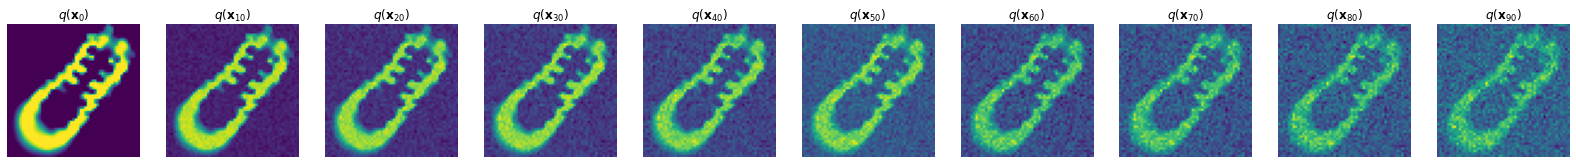

In [6]:
def forward_process(x_start, n_steps, noise=None):
    """ Diffuse the data (t == 0 means diffused for 1 step) """
    x_seq = [x_start]
    for n in range(n_steps):
        x_seq.append((torch.sqrt(1 - betas[n]) * x_seq[-1]) + (betas[n] * torch.rand_like(x_start)))
    return x_seq

n_steps = 100
betas = torch.tensor([0.035] * n_steps)
dataset = torch.Tensor(data.T).float()
x_seq = forward_process(dataset, n_steps, betas)
fig, axs = plt.subplots(1, 10, figsize=(28, 3))

for i in range(10):
    axs[i].imshow(x_seq[i*10].detach().numpy());
    axs[i].set_axis_off(); axs[i].set_title('$q(\mathbf{x}_{'+str(int((i / 10.0) * n_steps))+'})$')

We can define any type of variance schedules for $\beta_{1},\cdots,\beta_{n}$, as provided in the following function

In [7]:
def make_beta_schedule(schedule='linear', n_timesteps=1000, start=1e-5, end=1e-2):
    if schedule == 'linear':
        betas = torch.linspace(start, end, n_timesteps)
    elif schedule == "quad":
        betas = torch.linspace(start ** 0.5, end ** 0.5, n_timesteps) ** 2
    elif schedule == "sigmoid":
        betas = torch.linspace(-6, 6, n_timesteps)
        betas = torch.sigmoid(betas) * (end - start) + start
    return betas

Interestingly, the forward process admits sampling $\mathbf{x}_{t}$ at an arbitrary timestep $t$. Using notations $\alpha_{t}=1-\beta_{t}$ and $\bar{\alpha}_{t} = \prod_{s=1}^{t} \alpha_{s}$, we have

$$
q(\mathbf{x}_{t}\mid\mathbf{x}_{t-1}) = \mathcal{N}(\mathbf{x}_{t} ; \sqrt{\bar{\alpha}_{t}}\mathbf{x}_{t-1},(1-\bar{\alpha}_{t})\mathbf{I})
$$

Therefore, we can update our diffusion sampling function to allow for this mecanism. Note that this depends on the given variance schedule of $\beta_{1},\cdots,\beta_{T}$ that we compute prior to the function.

In [8]:
betas = make_beta_schedule(schedule='sigmoid', n_timesteps=n_steps, start=1e-5, end=1e-2)
alphas = 1 - betas
alphas_prod = torch.cumprod(alphas, 0)
alphas_prod_p = torch.cat([torch.tensor([1]).float(), alphas_prod[:-1]], 0) #concats a 1 in front of alphas_prod; 
#dunno why
#used in the posterior mean coeff

alphas_bar_sqrt = torch.sqrt(alphas_prod)
one_minus_alphas_bar_log = torch.log(1 - alphas_prod)
one_minus_alphas_bar_sqrt = torch.sqrt(1 - alphas_prod)

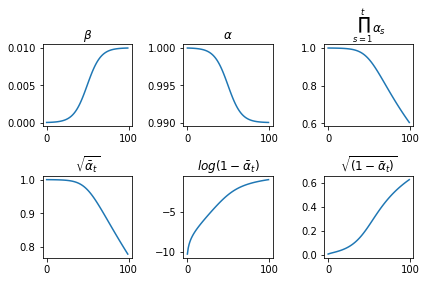

In [9]:
fig, ax = plt.subplots(2,3)
ax[0,0].plot(betas)
ax[0,0].set_title(r'$\beta$')
ax[0,1].plot(alphas)
ax[0,1].set_title(r'$\alpha$')
ax[0,2].plot(alphas_prod)
ax[0,2].set_title(r'$\prod_{s=1}^{t} \alpha_{s}$')
ax[1,0].plot(alphas_bar_sqrt)
ax[1,0].set_title(r'$\sqrt{\bar{\alpha}_{t}}$')
ax[1,1].plot(one_minus_alphas_bar_log)
ax[1,1].set_title(r'$log{(1-\bar{\alpha}_{t})}$')
ax[1,2].plot(one_minus_alphas_bar_sqrt)
ax[1,2].set_title(r'$\sqrt{(1-\bar{\alpha}_{t})}$')



fig.tight_layout(pad=1.0)
 
plt.show()

This allows to perform a very efficient implementation of the forward process, where we can directly sample at any given timesteps, as shown in the following code.

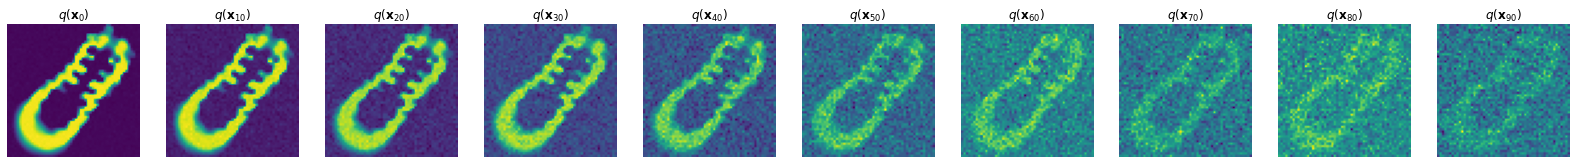

In [10]:
def extract(input, t, x):
    shape = x.shape
    out = torch.gather(input, 0, t.to(input.device))
    reshape = [t.shape[0]] + [1] * (len(shape) - 1)
    return out.reshape(*reshape) # *operator evaluates to an iterable

def q_sample(x_0, t, noise=None):
    if noise is None:
        noise = torch.randn_like(x_0)
    alphas_t = extract(alphas_bar_sqrt, t, x_0)
    alphas_1_m_t = extract(one_minus_alphas_bar_sqrt, t, x_0)
    return (alphas_t * x_0 + alphas_1_m_t * noise)

fig, axs = plt.subplots(1, 10, figsize=(28, 3))
for i in range(10):
    q_i = q_sample(dataset, torch.tensor([i * 10]))
    axs[i].imshow(q_i.detach().numpy());
    axs[i].set_axis_off(); axs[i].set_title('$q(\mathbf{x}_{'+str(i*10)+'})$')

Note that for training, we will also need to have access to the mean and variance of the posterior distribution of this process.

In [11]:
posterior_mean_coef_1 = (betas * torch.sqrt(alphas_prod_p) / (1 - alphas_prod))
posterior_mean_coef_2 = ((1 - alphas_prod_p) * torch.sqrt(alphas) / (1 - alphas_prod))
posterior_variance = betas * (1 - alphas_prod_p) / (1 - alphas_prod)
posterior_log_variance_clipped = torch.log(torch.cat((posterior_variance[1].view(1, 1), posterior_variance[1:].view(-1, 1)), 0)).view(-1)

def q_posterior_mean_variance(x_0, x_t, t):
    coef_1 = extract(posterior_mean_coef_1, t, x_0)
    coef_2 = extract(posterior_mean_coef_2, t, x_0)
    #mean = coef_1 * x_0 + coef_2 * x_t
    mean = torch.cat((torch.mean(x_0, 1, True)*coef_1,torch.mean(x_t, 1, True)*coef_2),1)
    var = extract(posterior_log_variance_clipped, t, x_0)
    return mean, var

#### Reverse process

The generative distribution that we aim to learn will be trained to perform the _reverse_ trajectory, starting from Gaussian noise to gradually remove local perturbations. Therefore the reverse process starts with our given tractable distribution $p(\mathbf{x}_{T})=\pi(\mathbf{x}_{T})$ and is described as

$$
p_{\theta}(\mathbf{x}_{0:T}) =  p(\mathbf{x}_{T}) \prod_{t=1}^{T} p_{\theta}(\mathbf{x}_{t-1}\mid\mathbf{x}_{t})
$$

Each of the transitions in this process can simply be defined as conditional Gaussians (**note**: which is reminiscent of the definition of VAEs). Therefore, during learning, only the mean and covariancce for a Gaussian diffusion kernel needs to be trained

$$
p_{\theta}(\mathbf{x}_{t-1}\mid\mathbf{x}_{t}) = \mathcal{N}(\mathbf{x}_{t-1} ; \mathbf{\mu}_{\theta}(\mathbf{x}_{t},t),\mathbf{\Sigma}_{\theta}(\mathbf{x}_{t},t))
$$

The two functions defining the mean $\mathbf{\mu}_{\theta}(\mathbf{x}_{t},t)$ and covariance $\mathbf{\Sigma}_{\theta}(\mathbf{x}_{t},t)$ can be parametrized by deep neural networks. Note also that these functions are parametrized by $t$, which means that a single model can be used for all time steps.

Here, we show a naive implementation of this process, where we have a given `model` to infer variance. Note that this model is _shared across all time steps_ but conditionned on that said time step.

In [12]:
import torch.nn.functional as F
class ConditionalLinear(nn.Module):
    def __init__(self, num_in, num_out, n_steps):
        super(ConditionalLinear, self).__init__()
        self.num_out = num_out
        self.lin = nn.Linear(num_in, num_out)
        self.embed = nn.Embedding(n_steps, num_out)
        self.embed.weight.data.uniform_()

    def forward(self, x, y):
        out = self.lin(x)
        gamma = self.embed(y)
        out = gamma.view(-1, self.num_out) * out
        return out
class ConditionalModel(nn.Module):
    def __init__(self, n_steps):
        super(ConditionalModel, self).__init__()
        self.lin1 = ConditionalLinear(55, 128, n_steps)
        self.lin2 = ConditionalLinear(128, 128, n_steps)
        self.lin3 = nn.Linear(128, 55)
    
    def forward(self, x, y):
        x = F.softplus(self.lin1(x, y))
        x = F.softplus(self.lin2(x, y))
        return self.lin3(x)
model = ConditionalModel(n_steps)
    
def p_mean_variance(model, x, t):
    # Go through model
    out = model(x, t)
    # Extract the mean and variance
    mean, log_var = torch.split(out, 2, dim=-1)
    var = torch.exp(log_var)
    return mean, log_var

In [13]:
def p_sample(model, x, t):
    mean, log_var = p_mean_variance(model, x, torch.tensor(t))
    noise = torch.randn_like(x)
    shape = [x.shape[0]] + [1] * (x.ndimension() - 1)
    nonzero_mask = (1 - (t == 0))
    sample = mean + torch.exp(0.5 * log_var) * noise
    return (sample) 

In [14]:
def p_sample_loop(model, shape):
    cur_x = torch.randn(shape)
    x_seq = [cur_x]
    for i in reversed(range(n_steps)):
        cur_x = p_sample(model, cur_x, i)
        x_seq.append(cur_x)
    return x_seq

In [15]:
def normal_kl(mean1, logvar1, mean2, logvar2):
    kl = 0.5 * (-1.0 + logvar2 - logvar1 + torch.exp(logvar1 - logvar2) + ((mean1 - mean2) ** 2) * torch.exp(-logvar2))
    return kl

def entropy(val):
    return (0.5 * (1 + np.log(2. * np.pi))) + 0.5 * np.log(val)

In [16]:
def compute_loss(true_mean, true_var, model_mean, model_var):
    # the KL divergence between model transition and posterior from data
    KL = normal_kl(true_mean, true_var, model_mean, model_var).float()
    # conditional entropies H_q(x^T|x^0) and H_q(x^1|x^0)
    H_start = entropy(betas[0].float()).float()
    beta_full_trajectory = 1. - torch.exp(torch.sum(torch.log(alphas))).float()
    H_end = entropy(beta_full_trajectory.float()).float()
    H_prior = entropy(torch.tensor([1.])).float()
    negL_bound = KL * n_steps + H_start - H_end + H_prior
    # the negL_bound if this was an isotropic Gaussian model of the data
    negL_gauss = entropy(torch.tensor([1.])).float()
    negL_diff = negL_bound - negL_gauss
    L_diff_bits = negL_diff / np.log(2.)
    L_diff_bits_avg = L_diff_bits.mean()
    return L_diff_bits_avg

In [17]:
def loss_likelihood_bound(model, x_0):
    batch_size = x_0.shape[0]
    # Select a random step for each example
    t = torch.randint(0, n_steps, size=(batch_size // 2 + 1,))
    t = torch.cat([t, n_steps - t - 1], dim=0)[:batch_size].long()
    # Perform diffusion for step t
    x_t = q_sample(x_0, t)
    # Compute the true mean and variance
    true_mean, true_var = q_posterior_mean_variance(x_0, x_t, t)
    # Infer the mean and variance with our model
    model_mean, model_var = p_mean_variance(model, x_t, t)
    # Compute the loss
    return compute_loss(true_mean, true_var, model_mean, model_var)

We can very simply optimize this loss with the following training loop.

## Denoising diffusion probabilistic models (DDPM)

In a very recent article, Ho et al. [ [ 1 ] ](#ref1) constructed over the diffusion models idea, by proposing several enhancements allowing to enhance the quality of the results. First, they proposed to rely on the following parameterization for the mean function
$$
\mathbf{\mu}_{\theta}(\mathbf{x}_{t}, t) = \frac{1}{\sqrt{\alpha_{t}}} \left( (\mathbf{x}_{t} - \frac{\beta_{t}}{\sqrt{1 - \bar{\alpha}}_{t}} \mathbf{\epsilon}_{\theta} (\mathbf{x}_{t}, t) \right) 
$$

Note that now, the model is trained at outputing directly a form of _noise_ function, which is used in the sampling process. Furthermore, the authors suggest to rather use a fixed variance function

$$
\mathbf{x}_{t-1} = \frac{1}{\sqrt{\alpha_{t}}} \left( \mathbf{x}_{t} - \frac{1-\alpha_{t}}{\sqrt{1-\bar{\alpha_{t}}}} \mathbf{\epsilon}_{\theta}(\mathbf{x}_{t}, t) \right) + \sigma_{t}\mathbf{z}
$$

This leads to a new sampling procedure for the reverse process as follows (we also quickly redefine the model to output the correct dimensionality).

In [25]:
class ConditionalModel(nn.Module):
    def __init__(self, n_steps):
        super(ConditionalModel, self).__init__()
        self.lin1 = ConditionalLinear(55, 128, n_steps)
        self.lin2 = ConditionalLinear(128, 300, n_steps)
        self.lin3 = ConditionalLinear(300, 128, n_steps)
        self.lin4 = nn.Linear(128, 55)
    
    def forward(self, x, y):
        x = F.softplus(self.lin1(x, y))
        x = F.softplus(self.lin2(x, y))
        x = F.softplus(self.lin3(x, y))
        return self.lin4(x)

def p_sample(model, x, t):
    t = torch.tensor([t])
    # Factor to the model output
    eps_factor = ((1 - extract(alphas, t, x)) / extract(one_minus_alphas_bar_sqrt, t, x))
    # Model output
    eps_theta = model(x, t)
    # Final values
    mean = (1 / extract(alphas, t, x).sqrt()) * (x - (eps_factor * eps_theta))
    # Generate z
    z = torch.randn_like(x)
    # Fixed sigma
    sigma_t = extract(betas, t, x).sqrt()
    sample = mean + sigma_t * z
    return (sample)

Notably, the forward process posteriors are tractable when conditioned on $\mathbf{x}_{0}$

\begin{align}
q(\mathbf{x}_{t}\mid\mathbf{x}_{t-1}) &= \mathcal{N}(\mathbf{x}_{t-1} ; \mathbf {1-\beta_{t}}\mathbf{x}_{t-1},\beta_{t}\mathbf{I})
\end{align}

And we can obtain the corresponding mean $\tilde{\mathbf{\mu}}_{t}(\mathbf{x}_{t},\mathbf{x}_{0})$ and variance $\tilde{\beta}$ as

\begin{align}
\tilde{\mathbf{\mu}}_{t}(\mathbf{x}_{t},\mathbf{x}_{0}) &= \frac{\sqrt{\bar{\alpha}_{t-1}}\beta_{t}}{1 - \bar{\alpha}_{t}}\mathbf{x}_{0} + \frac{\sqrt{\bar{\alpha}_{t}}(1 - \bar{\alpha}_{t-1})}{1 - \bar{\alpha}_{t}}\mathbf{x}_{t}\\
\tilde{\beta}_{t} &= \frac{1 - \bar{\alpha}_{t-1}}{1 - \bar{\alpha}_{t}}\beta_{t}
\end{align}

## Training in DDPM

Further improvements come from variance reduction by rewriting $\mathcal{L}$ as a sum of KL divergences

\begin{align}
\mathcal{L} &= \mathbb{E}_{q}\left[ \mathcal{L}_{T} + \sum_{t>1} \mathcal{L}_{t-1} + \mathcal{L}_{0} \right] \\
\mathcal{L}_{T} &= D_{KL}(q(\mathbf{x}_{T}\mid\mathbf{x}_{0}) \Vert p(\mathbf{x}_{T})) \\
\mathcal{L}_{t-1} &= D_{KL}(q(\mathbf{x}_{t-1}\mid\mathbf{x}_{t},\mathbf{x}_{0}) \Vert p_{\theta}(\mathbf{x}_{t-1}\mid\mathbf{x}_{t})) \\
\mathcal{L}_{0} &= - \log p_{\theta}(\mathbf{x}_{0}\mid\mathbf{x}_{1}) 
\end{align}

All the KL divergences defined in this equation compare Gaussians, which means that they have a closed-form solution.

In [26]:
def approx_standard_normal_cdf(x):
    return 0.5 * (1.0 + torch.tanh(torch.tensor(np.sqrt(2.0 / np.pi)) * (x + 0.044715 * torch.pow(x, 3))))

def discretized_gaussian_log_likelihood(x, means, log_scales):
    # Assumes data is integers [0, 255] rescaled to [-1, 1]
    centered_x = x - means
    inv_stdv = torch.exp(-log_scales)
    plus_in = inv_stdv * (centered_x + 1. / 255.)
    cdf_plus = approx_standard_normal_cdf(plus_in)
    min_in = inv_stdv * (centered_x - 1. / 255.)
    cdf_min = approx_standard_normal_cdf(min_in)
    log_cdf_plus = torch.log(torch.clamp(cdf_plus, min=1e-12))
    log_one_minus_cdf_min = torch.log(torch.clamp(1 - cdf_min, min=1e-12))
    cdf_delta = cdf_plus - cdf_min
    log_probs = torch.where(x < -0.999, log_cdf_plus, torch.where(x > 0.999, log_one_minus_cdf_min, torch.log(torch.clamp(cdf_delta, min=1e-12))))
    return log_probs

This leads to a new loss function as implemented in the following (note that this objective does not provide large change to the optimization itself).

In [27]:
def loss_variational(model, x_0):
    batch_size = x_0.shape[0]
    # Select a random step for each example
    t = torch.randint(0, n_steps, size=(batch_size // 2 + 1,))
    t = torch.cat([t, n_steps - t - 1], dim=0)[:batch_size].long()
    # Perform diffusion for step t
    x_t = q_sample(x_0, t)
    # Compute the true mean and variance
    true_mean, true_var = q_posterior_mean_variance(x_0, x_t, t)
    # Infer the mean and variance with our model
    model_mean, model_var = p_mean_variance(model, x_t, t)
    # Compute the KL loss
    kl = normal_kl(true_mean, true_var, model_mean, model_var)
    kl = torch.mean(kl.view(batch_size, -1), dim=1) / np.log(2.)
    # NLL of the decoder
    decoder_nll = -discretized_gaussian_log_likelihood(x_0, means=model_mean, log_scales=0.5 * model_var)
    decoder_nll = torch.mean(decoder_nll.view(batch_size, -1), dim=1) / np.log(2.)
    # At the first timestep return the decoder NLL, otherwise return KL(q(x_{t-1}|x_t,x_0) || p(x_{t-1}|x_t))
    output = torch.where(t == 0, decoder_nll, kl)
    return output.mean(-1)

### Simplifying loss to denoising score matching

The paper by Ho et al. [ [ 1 ] ](#ref1) proposes a new parameterization for the mean of the reverse process
$$
\mathbf{x}_{t-1} = \frac{1}{\sqrt{\alpha_{t}}} \left( \mathbf{x}_{t} - \frac{1 - \alpha_{t}}{\sqrt{1-\bar{\alpha_{t}}}} \mathbf{\epsilon}_{\theta}(\mathbf{x}_{t}, t) \right) + \sigma_{t}\mathbf{z}
$$
Based on this parametrization, they show that the training objective can simplify to
$$
\mathcal{L}_{t-1}-C=\mathbb{E}_{\mathbf{x}_{0},\mathbf{\epsilon}}\left[ \frac{\beta_{t}^{2}}{2\sigma_{t}^{2}\alpha_{t}(1-\bar{\alpha}_{t})} \Vert \epsilon - \epsilon_{\theta}(\sqrt{\bar{\alpha}_{t}}\mathbf{x}_{0} + \sqrt{1 - \bar{\alpha}_{t}}\mathbf{\epsilon}, t) \Vert^{2} \right]
$$
which resembles denoising score matching over multiple noise scales indexed by $t$.

#### Further simplified training objective

The authors discuss the fact that it is beneficial to the sample quality to completely remove the complicated factor at the beginning of the loss. This further simplifies the objective as
$$
\mathcal{L}_{\text{simple}}=\mathbb{E}_{t, \mathbf{x}_{0},\mathbf{\epsilon}}\left[ \Vert \epsilon - \epsilon_{\theta}(\sqrt{\bar{\alpha}_{t}}\mathbf{x}_{0} + \sqrt{1 - \bar{\alpha}_{t}}\mathbf{\epsilon}, t) \Vert^{2} \right].
$$
We can see that this objective now very closely ressemble the denoising score matching formulation. Furthermore, it provides an extremely simple implementation.

In [28]:
def noise_estimation_loss(model, x_0):
    batch_size = x_0.shape[0]
    # Select a random step for each example
    t = torch.randint(0, n_steps, size=(batch_size // 2 + 1,))
    t = torch.cat([t, n_steps - t - 1], dim=0)[:batch_size].long()
    # x0 multiplier
    a = extract(alphas_bar_sqrt, t, x_0)
    # eps multiplier
    am1 = extract(one_minus_alphas_bar_sqrt, t, x_0)
    e = torch.randn_like(x_0)
    # model input
    x = x_0 * a + e * am1
    output = model(x, t)
    return (e - output).square().mean()

#### Stabilizing training with Exponential Moving Average (EMA)

This idea is found in most of the implementations, which allows to implement a form of _model momentum_. Instead of directly updating the weights of the model, we keep a copy of the previous values of the weights, and then update a weighted mean between the previous and new version of the weights. Here, we reuse the implementation proposed in the [DDIM repository](https://github.com/ermongroup/ddim).

In [29]:
class EMA(object):
    def __init__(self, mu=0.999):
        self.mu = mu
        self.shadow = {}

    def register(self, module):
        for name, param in module.named_parameters():
            if param.requires_grad:
                self.shadow[name] = param.data.clone()

    def update(self, module):
        for name, param in module.named_parameters():
            if param.requires_grad:
                self.shadow[name].data = (1. - self.mu) * param.data + self.mu * self.shadow[name].data

    def ema(self, module):
        for name, param in module.named_parameters():
            if param.requires_grad:
                param.data.copy_(self.shadow[name].data)

    def ema_copy(self, module):
        module_copy = type(module)(module.config).to(module.config.device)
        module_copy.load_state_dict(module.state_dict())
        self.ema(module_copy)
        return module_copy

    def state_dict(self):
        return self.shadow

    def load_state_dict(self, state_dict):
        self.shadow = state_dict

The training loop is finally obtained with the following code

tensor(1.1660, grad_fn=<MeanBackward0>)
tensor(0.3965, grad_fn=<MeanBackward0>)
tensor(0.2807, grad_fn=<MeanBackward0>)
tensor(0.2918, grad_fn=<MeanBackward0>)
tensor(0.1689, grad_fn=<MeanBackward0>)
tensor(0.1607, grad_fn=<MeanBackward0>)
tensor(0.1375, grad_fn=<MeanBackward0>)
tensor(0.1409, grad_fn=<MeanBackward0>)
tensor(0.1363, grad_fn=<MeanBackward0>)
tensor(0.1181, grad_fn=<MeanBackward0>)


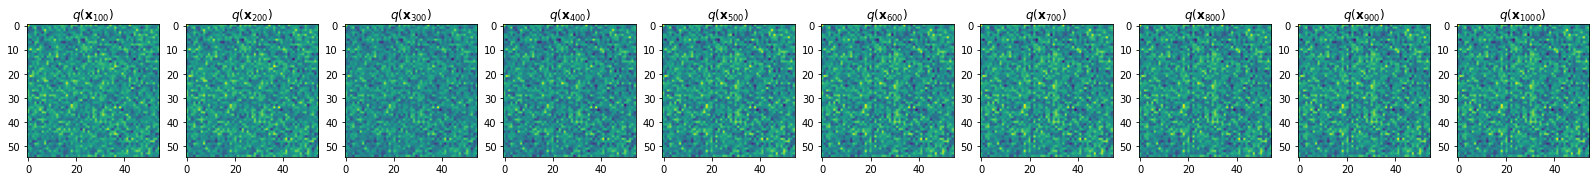

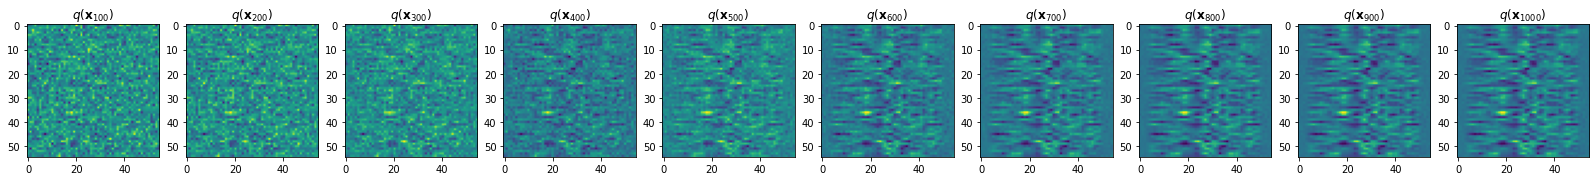

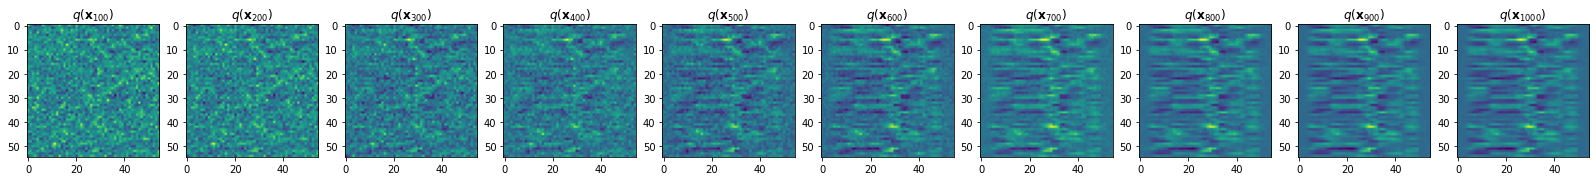

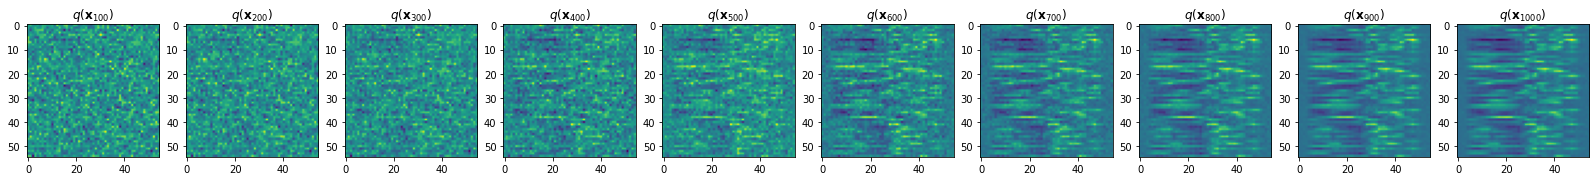

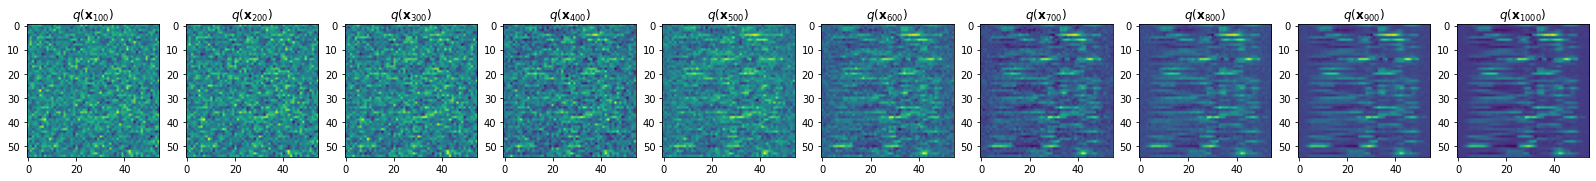

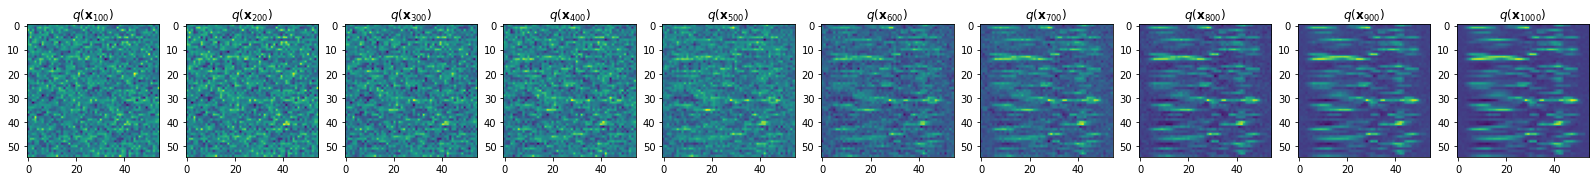

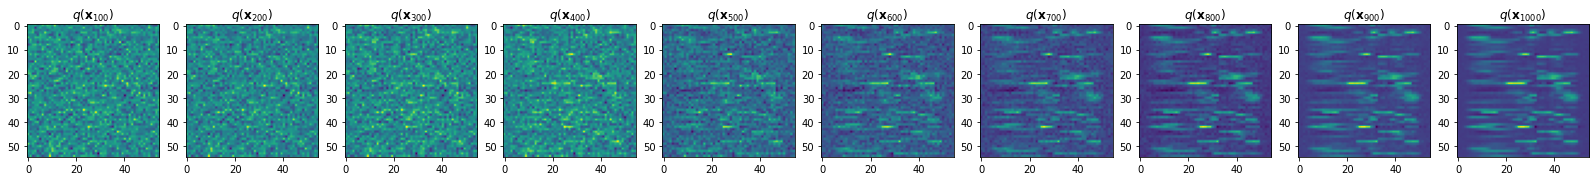

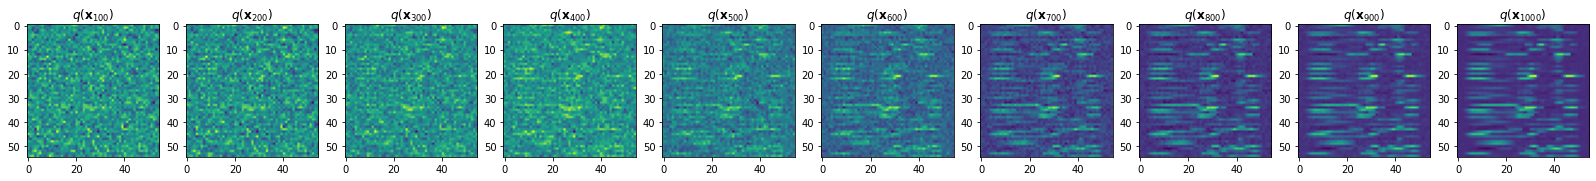

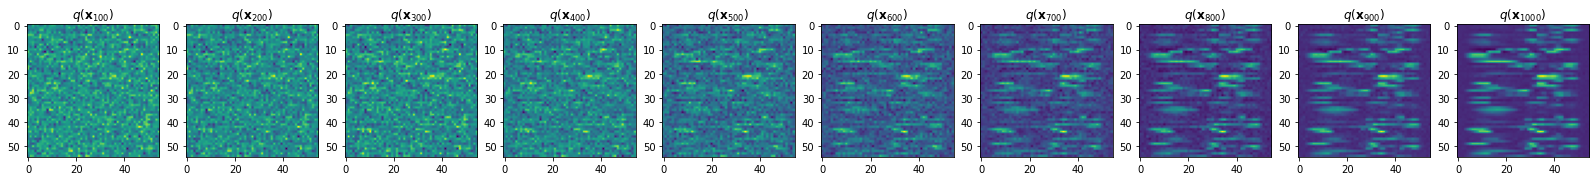

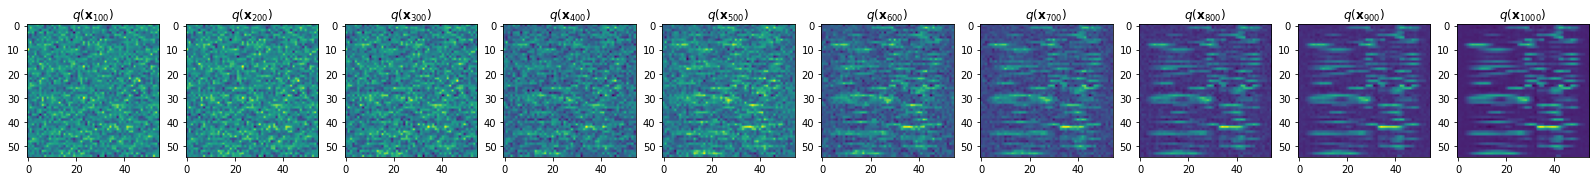

In [30]:
model = ConditionalModel(n_steps)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
dataset = torch.tensor(data.T).float()
# Create EMA model
ema = EMA(0.9)
ema.register(model)
# Batch size
batch_size = 128
for t in range(50000):
    
    for i in range(0, dataset.size()[0], batch_size):
        
        batch_x = dataset[0:dataset.size()[0]]
        # Compute the loss.
        loss = noise_estimation_loss(model, batch_x)
        # Before the backward pass, zero all of the network gradients
        optimizer.zero_grad()
        # Backward pass: compute gradient of the loss with respect to parameters
        loss.backward()
        # Perform gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.)
        # Calling the step function to update the parameters
        optimizer.step()
        # Update the exponential moving average
        ema.update(model)
    # Print loss
    if (t % 5000 == 0):
        print(loss)
        x_seq = p_sample_loop(model, dataset.shape)
        fig, axs = plt.subplots(1, 10, figsize=(28, 3))
        for i in range(1, 11):
            cur_x = x_seq[i * 10].detach()
            axs[i-1].imshow(cur_x.detach().numpy());
            #axs[i-1].set_axis_off(); 
            axs[i-1].set_title('$q(\mathbf{x}_{'+str(i*100)+'})$')

In [ ]:
out = model(dataset,torch.tensor(20))
plt.imshow(out.detach().numpy())

In [ ]:
print(cur_x.shape)
plt.imshow(cur_x.detach().numpy());

In [ ]:
cur_x.detach().numpy()

# Lenia

In [ ]:
%matplotlib inline
import numpy as np
import scipy.signal
import matplotlib.pylab as plt
import matplotlib.animation
import IPython.display

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)                 

# default values
R = 1

def figure_world(A, cmap='viridis'):
  global img
  fig = plt.figure()
  img = plt.imshow(A, cmap=cmap, interpolation="nearest", vmin=0)
  plt.title('world A')
  plt.close()
  return fig

def figure_asset(K, growth, cmap='viridis', K_sum=1, bar_K=False):
  global R
  K_size = K.shape[0];  K_mid = K_size // 2
  fig, ax = plt.subplots(1, 3, figsize=(14,2), gridspec_kw={'width_ratios': [1,1,2]})
  ax[0].imshow(K, cmap=cmap, interpolation="nearest", vmin=0)
  ax[0].title.set_text('kernel K')
  if bar_K:
    ax[1].bar(range(K_size), K[K_mid,:], width=1)
  else:
    ax[1].plot(range(K_size), K[K_mid,:])
  ax[1].title.set_text('K cross-section')
  ax[1].set_xlim([K_mid - R - 3, K_mid + R + 3])
  if K_sum <= 1:
    x = np.linspace(0, K_sum, 1000)
    ax[2].plot(x, growth(x))
  else:
    x = np.arange(K_sum + 1)
    ax[2].step(x, growth(x))
  ax[2].axhline(y=0, color='grey', linestyle='dotted')
  ax[2].title.set_text('growth G')
  return fig

def figure_asset_list(Ks, nKs, growth, kernels, use_c0=False, cmap='viridis', K_sum=1):
  global R
  K_size = Ks[0].shape[0];  K_mid = K_size // 2
  fig, ax = plt.subplots(1, 3, figsize=(14,2), gridspec_kw={'width_ratios': [1,2,2]})
  if use_c0:
    K_stack = [ np.clip(np.zeros(Ks[0].shape) + sum(K/3 for k,K in zip(kernels,Ks) if k['c0']==l), 0, 1) for l in range(3) ]
  else:
    K_stack = Ks[:3]
  ax[0].imshow(np.dstack(K_stack), cmap=cmap, interpolation="nearest", vmin=0)
  ax[0].title.set_text('kernels Ks')
  X_stack = [ K[K_mid,:] for K in nKs ]
  ax[1].plot(range(K_size), np.asarray(X_stack).T)
  ax[1].title.set_text('Ks cross-sections')
  ax[1].set_xlim([K_mid - R - 3, K_mid + R + 3])
  x = np.linspace(0, K_sum, 1000)
  G_stack = [ growth(x, k['m'], k['s']) * k['h'] for k in kernels ]
  ax[2].plot(x, np.asarray(G_stack).T)
  ax[2].axhline(y=0, color='grey', linestyle='dotted')
  ax[2].title.set_text('growths Gs')
  return fig

def figure_panels(As, Ks, cmap='viridis'):
  global img1, img2, img3, img4
  A_size = As[0].shape[0]
  K_stack = [ np.clip(np.zeros(Ks[0].shape) + sum(K/3 for k,K in zip(kernels,Ks) if k['c0']==l), 0, 1) for l in range(3) ]
  fig = plt.figure(figsize=(8,8), dpi=75, frameon=False)
  plt.subplot(221).set_axis_off();  img1 = plt.imshow(np.dstack(As), vmin=0)
  plt.subplot(222).set_axis_off();  img2 = plt.imshow(np.dstack([np.zeros([A_size, A_size])]*3), vmin=0)
  plt.subplot(223).set_axis_off();  img3 = plt.imshow(np.dstack([np.zeros([A_size, A_size])]*3), vmin=0)
  plt.subplot(224).set_axis_off();  img4 = plt.imshow(np.dstack(K_stack), vmin=0)
  fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
  plt.close()
  return fig



In [ ]:
pattern={}
#m=0.1199 to 0.1205
pattern["test8"] = {"name":"test8","R":10,"b1":34,"b2":45,"s1":34,"s2":58,
  "cells":cur_x.detach().numpy()}

In [ ]:
bell = lambda x, m, s: np.exp(-((x-m)/s)**2 / 2)
size = 128
''' scaling factor and initial position '''
scale = 1;  cx, cy = 30, 30
''' load pattern, including parameters R, T, m, s, and cells '''
T = 10

globals().update(pattern["test8"]);  C = np.asarray(cells)
''' create empty world '''
#A = np.random.rand(size, size)
A = np.zeros([size, size])
''' place scaled pattern '''
C = scipy.ndimage.zoom(C, scale, order=0);  R *= scale
A[cx:cx+C.shape[0], cy:cy+C.shape[1]] = C
D = np.linalg.norm(np.asarray(np.ogrid[-R:R, -R:R]) + 1) / R
K = (D<1) * bell(D, 0.5, 0.15)
K = K / np.sum(K)

def growth(U):
  m = 0.1452
  s = 0.015
  return bell(U, m, s)*2-1

def update(i):
  global A, img
  U = scipy.signal.convolve2d(A, K, mode='same', boundary='wrap')
  A = np.clip(A + 1/T * growth(U), 0, 1)
  img.set_array(A)
  return img,

#figure_asset(K, growth)
fig = figure_world(A)
IPython.display.HTML(matplotlib.animation.FuncAnimation(fig, update, frames=250, interval=20).to_jshtml())